In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

#loading data

In [3]:
file_path = 'C:\\Edrive\\datascience\\dataset\\booking.csv'
df = pd.read_csv(file_path)
print(df.head())


  Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price  \

## getting info


In [4]:
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

(36285, 17)

# cleaning data

In [5]:
print(df.columns)
print(df.isna().sum())
print(df.duplicated().sum())
print(df.isna().sum().sum())
print(df.duplicated())
print(df.drop_duplicates(inplace=True))

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')
Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64
0
0
0        False
1        False
2        False
3        False
4        False
         ...  
36280    False
36281  

# finding outliers

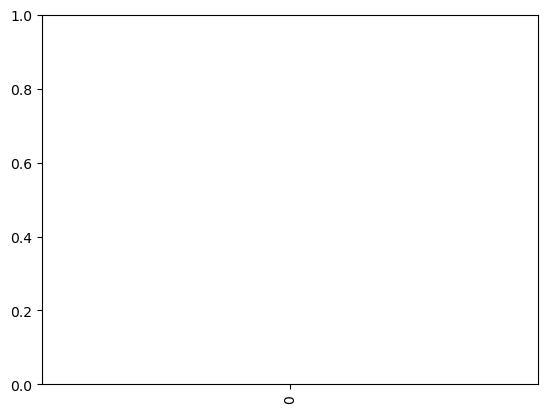

In [6]:
sns.boxplot(df=df)
plt.xticks(rotation=90)
plt.show()

                          number of adults  number of children  \
number of adults                  1.000000           -0.020027   
number of children               -0.020027            1.000000   
number of weekend nights          0.103316            0.029536   
number of week nights             0.105416            0.024680   
car parking space                 0.011467            0.034198   
lead time                         0.097014           -0.047058   
repeated                         -0.192175           -0.036371   
P-C                              -0.047395           -0.016398   
P-not-C                          -0.119106           -0.021201   
average price                     0.296832            0.337491   
special requests                  0.189317            0.124363   

                          number of weekend nights  number of week nights  \
number of adults                          0.103316               0.105416   
number of children                        0.029536   

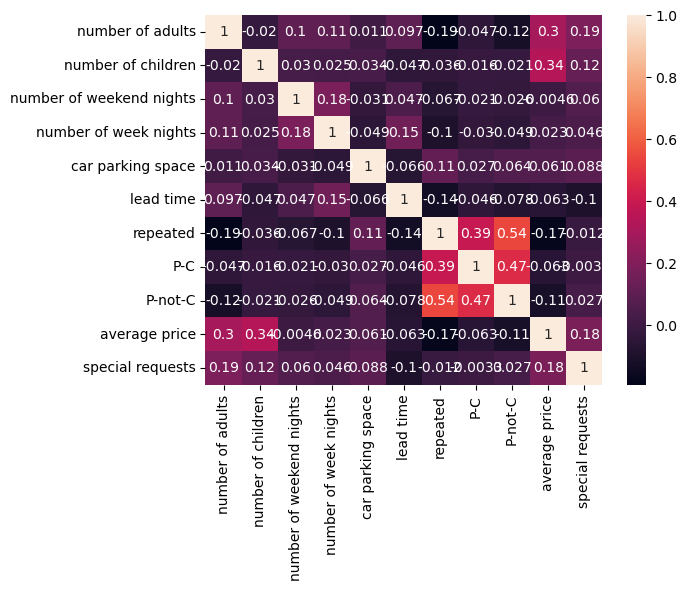

In [7]:
correlation=df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.show()

In [8]:
print(df.describe())

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.0000

# changing datatype

In [9]:
df['Booking_ID']=df['Booking_ID'].astype('string')
df['number of adults']=df['number of adults'].astype('string')
df['number of children']=df['number of children'].astype('string')
df['number of weekend nights']=df['number of weekend nights'].astype('string')
df['number of week nights']=df['number of week nights'].astype('string')
df['type of meal']=df['type of meal'].astype('string')
df['car parking space']=df['car parking space'].astype('string')
df['room type']=df['room type'].astype('string')
df['lead time']=df['lead time'].astype('string')
df['market segment type']=df['market segment type'].astype('string')
df['repeated']=df['repeated'].astype('string')
df['P-C']=df['P-C'].astype('string')
df['P-not-C']=df['P-not-C'].astype('string')
df['average price']=df['average price'].astype('string')
df['special requests']=df['special requests'].astype('string')
df['date of reservation']=df['date of reservation'].astype('string')
df['booking status']=df['booking status'].astype('string')

# Assigning independant and dependant varibale to x and y

In [10]:
x=df.iloc[:,:16]
print(x)
y=df['booking status']
print(y)

      Booking_ID number of adults number of children number of weekend nights  \
0       INN00001                1                  1                        2   
1       INN00002                1                  0                        1   
2       INN00003                2                  1                        1   
3       INN00004                1                  0                        0   
4       INN00005                1                  0                        1   
...          ...              ...                ...                      ...   
36280   INN36282                2                  0                        0   
36281   INN36283                2                  0                        1   
36282   INN36284                2                  0                        1   
36283   INN36285                3                  0                        0   
36284   INN36286                2                  0                        0   

      number of week nights

 encoding categorical variables

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
c=['Booking_ID','number of adults','number of children','number of weekend nights','number of week nights','type of meal','car parking space','room type','lead time','market segment type','repeated','P-C','P-not-C','average price','special requests','date of reservation','booking status']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'),c)], remainder='passthrough')
x_encoded=ct.fit_transform(df)

# splitting data to training and test data

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=.2,random_state=0)

In [13]:
x_train

<29028x41236 sparse matrix of type '<class 'numpy.float64'>'
	with 265862 stored elements in Compressed Sparse Row format>

In [14]:
y_train

17929        Canceled
26196    Not_Canceled
26201    Not_Canceled
10957    Not_Canceled
14648    Not_Canceled
             ...     
20757        Canceled
32103        Canceled
30403        Canceled
21243    Not_Canceled
2732     Not_Canceled
Name: booking status, Length: 29028, dtype: string

In [15]:
x_test

<7257x41236 sparse matrix of type '<class 'numpy.float64'>'
	with 66424 stored elements in Compressed Sparse Row format>

In [16]:
y_test

25951        Canceled
25828    Not_Canceled
36016    Not_Canceled
25304        Canceled
8085     Not_Canceled
             ...     
15543    Not_Canceled
29200        Canceled
21027        Canceled
35141    Not_Canceled
29945        Canceled
Name: booking status, Length: 7257, dtype: string

# importing standard scaler

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler(with_mean=False)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# model creation

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)
y_pred= classifier.predict(x_test)
print(y_pred)
print("Prediction comparison")
predict_1=pd.DataFrame({"Y_test":y_test,"Y-pred":y_pred})
print(predict_1.to_string())
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', (accuracy*100))

['Not_Canceled' 'Not_Canceled' 'Not_Canceled' ... 'Canceled'
 'Not_Canceled' 'Not_Canceled']
Prediction comparison
             Y_test        Y-pred
25951      Canceled  Not_Canceled
25828  Not_Canceled  Not_Canceled
36016  Not_Canceled  Not_Canceled
25304      Canceled      Canceled
8085   Not_Canceled  Not_Canceled
3151   Not_Canceled  Not_Canceled
1067   Not_Canceled  Not_Canceled
22648      Canceled  Not_Canceled
12017      Canceled  Not_Canceled
30354  Not_Canceled  Not_Canceled
9797       Canceled      Canceled
3103   Not_Canceled  Not_Canceled
4951   Not_Canceled  Not_Canceled
30348  Not_Canceled  Not_Canceled
3042   Not_Canceled  Not_Canceled
23209  Not_Canceled  Not_Canceled
9684   Not_Canceled  Not_Canceled
9239   Not_Canceled  Not_Canceled
23767      Canceled      Canceled
36271      Canceled  Not_Canceled
34451  Not_Canceled  Not_Canceled
26719      Canceled  Not_Canceled
27837  Not_Canceled  Not_Canceled
31127      Canceled  Not_Canceled
34248  Not_Canceled  Not_Canceled
2

# boosting model

In [19]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model.fit(x_train, y_train)
Y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy:', (accuracy*100))

Accuracy: 100.0
